# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100
import numpy as np
import pandas as pd
import tensorflow as tf 

# Load the CIFAR-100 dataset
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
(x_train, y_train), (x_val, y_val) = cifar100.load_data(label_mode='fine')

Num GPUs Available:  0


In [2]:

# The dimensions of the images
image_shape = x_train.shape[1:]
print(f"Image shape: {image_shape}")  # (32, 32, 3)

num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")  # 100


train_df = pd.DataFrame({
    'image': list(x_train),
    'label': y_train.flatten()
})

# Check the distribution of labels in the training set
print(train_df['label'].value_counts())

Image shape: (32, 32, 3)
Number of classes: 100
label
19    500
69    500
88    500
32    500
34    500
     ... 
81    500
22    500
21    500
65    500
16    500
Name: count, Length: 100, dtype: int64


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(rescale=1.0/255.0)

y_train = to_categorical(y_train, 100)
y_val = to_categorical(y_val, 100)

# Apply normalization to training and validation sets using ImageDataGenerator
train_datagen = datagen.flow(x_train, y_train, batch_size=64)
val_datagen = datagen.flow(x_val, y_val, batch_size=64)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.optimizers import Adam
def create():
    model = Sequential()
    model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model




### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [5]:
from keras import optimizers

model=create()
model.summary()

model.fit(train_datagen.x, train_datagen.y, epochs=10, batch_size=32, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_val, y_val)


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952,036 (3.63 MB)

 Trainable params: 952,036 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0097 - loss: 47.5693 - val_accuracy: 0.0099 - val_loss: 4.6056
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0103 - loss: 4.6065 - val_accuracy: 0.0100 - val_loss: 4.6056
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0094 - loss: 4.6064 - val_accuracy: 0.0100 - val_loss: 4.6056
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0092 - loss: 4.6065 - val_accuracy: 0.0100 - val_loss: 4.6055
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0091 - loss: 4.6063 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0097 - loss: 4.6064 - val_accuracy: 0.0100 - val_loss: 4.6055
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0104 - loss: 4.6062 - val_accuracy: 0.0100 - val_loss: 4.6055
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0099 - loss: 4.6063 -

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_val.argmax(axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [7]:
# Your code here
# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.01
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.0

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Classification Probabilities for Correct Image: [0.00997742 0.01004995 0.01040448 0.01007237 0.0098261  0.00987638
 0.01026296 0.00989476 0.00991794 0.01038047 0.00992405 0.00969235
 0.01007921 0.00966217 0.00984292 0.01014052 0.01021804 0.00996105
 0.01014981 0.00984833 0.01007887 0.00965595 0.01042584 0.00990426
 0.00961734 0.00970902 0.01016256 0.0094503  0.01026034 0.00964344
 0.01015206 0.01014544 0.00998916 0.01000212 0.01029814 0.01025487
 0.00986645 0.01002464 0.00996912 0.0100603  0.01003141 0.01047074
 0.00929327 0.00996852 0.00983038 0.01019581 0.00981419 0.00990983
 0.00973    0.01004324 0.00979276 0.01046132 0.01017681 0.0101095
 0.00989582 0.01057298 0.01006947 0.00984275 0.00988019 0.00987987
 0.00980145 0.00970338 0.0102106  0.00995672 0.01017535 0.00982767
 0.01008435 0.00983413 0.01002727 0.01003353 0.01008764 0.01031291
 0.01006683 0.00994502 0.00971673 0.00995797 0.0108314  0.0101324
 0.0099986  0.00990782 0.01000892 0.01013575 0.00983359 0.00981764
 0.00974099 0.00

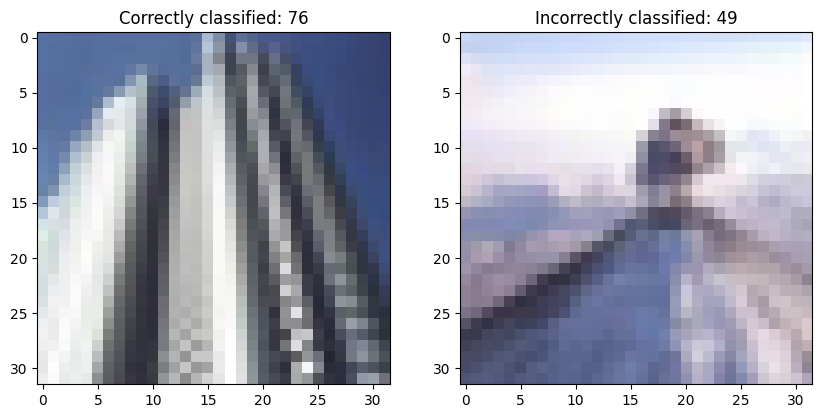

In [8]:

import matplotlib.pyplot as plt
# Find correctly classified example
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Display the first correctly classified image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_val[correct_indices[0]])
plt.title(f"Correctly classified: {np.argmax(y_val[correct_indices[0]])}")
print("Classification Probabilities for Correct Image:", y_pred[correct_indices[0]])

# Display the first incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_val[incorrect_indices[0]])
plt.title(f"Incorrectly classified: {np.argmax(y_val[incorrect_indices[0]])}")
print("Classification Probabilities for Incorrect Image:", y_pred[incorrect_indices[0]])

plt.show()

Discussion of Results

    Training and Validation Accuracy Plots: The plots show how the model's accuracy changes over epochs. Ideally, training accuracy should increase and validation accuracy should follow a similar trend. If validation accuracy starts to decrease while training accuracy continues to increase, it may indicate overfitting.
    
    Correctly and Incorrectly Classified Images: By examining these images, we can understand which features the model might be misinterpreting. The classification probabilities indicate the model’s confidence in its predictions.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

## LR reduction - prevents weight shifting when the model accuracy does not generally improve too much over iterations. that's when "FINE TUNING" happens with a reduced learn rate.
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

# Train the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_reduction])
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_val.argmax(axis=1)

Epoch 1/10
  62/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0106 - loss: 4.6056

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0104 - loss: 4.6062 - val_accuracy: 0.0100 - val_loss: 4.6058 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0098 - loss: 4.6064 - val_accuracy: 0.0100 - val_loss: 4.6057 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0098 - loss: 4.6061 - val_accuracy: 0.0100 - val_loss: 4.6055 - learning_rate: 0.0010
Epoch 4/10
1544/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0092 - loss: 4.6062
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0092 - loss: 4.6062 - val_accuracy: 0.0100 - val_loss: 4.6066 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0101 - loss: 4.6062 - val_accuracy: 0.0100 - val_loss: 4.6052 - learning_rate: 5.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0094 - loss: 4.6

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [10]:
# Your code here
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)



Accuracy: 0.01


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.


There was a very slight increase in the model accuracy (0.05) when using the enhanced model vs the original one. This is because we re-learnt the data at a slower learning rate and stopped in the point of diminishing returns.

This is because we're adjusting the weights at a slower learn rate and being more thorough with our data. 

There is room for further improvement by using techniques like batch normalization. 

In the future, I would experiment with Denser models, more parameters, a lot more training epochs through the data as I can already run it on the GPU.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.